# Import the Modules

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# Read the Data

In [10]:
data = pd.read_csv("heartdiesease.csv")

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Pre-processing

In [11]:
# Pre-processing the gender by mapping
gender_map = {
    'F' : 0,
    'M' : 1
}
data['Gender'] = data['Gender'].map(gender_map)

chestpaintype_map = {
    'ATA' : 0,
    'NAP' : 1,
    'ASY' : 2,
    'TA' : 3
}
data['ChestPainType'] = data['ChestPainType'].map(chestpaintype_map)


restingecg_map = {
    'Normal' : 0,
    'ST' : 1,
    'LVH' : 2
}
data['RestingECG'] = data['RestingECG'].map(restingecg_map)

angina_map = {
    'N' : 0,
    'Y' : 1
}
data['ExerciseAngina'] = data['ExerciseAngina'].map(angina_map)

stslope_map = {
    'Up' : 0,
    'Flat' : 1,
    'Down' : 2
}
data['ST_Slope'] = data['ST_Slope'].map(stslope_map)



x = data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] 
# x = data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]
y = data['HeartDisease']

# Split the data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

# Training the data

In [13]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

# Accuracy of the Data

In [14]:
# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy*100:.2f}'+'%')

Random Forest Accuracy: 86.39%


# Visualize and Test


Random Forest Confusion Matrix:


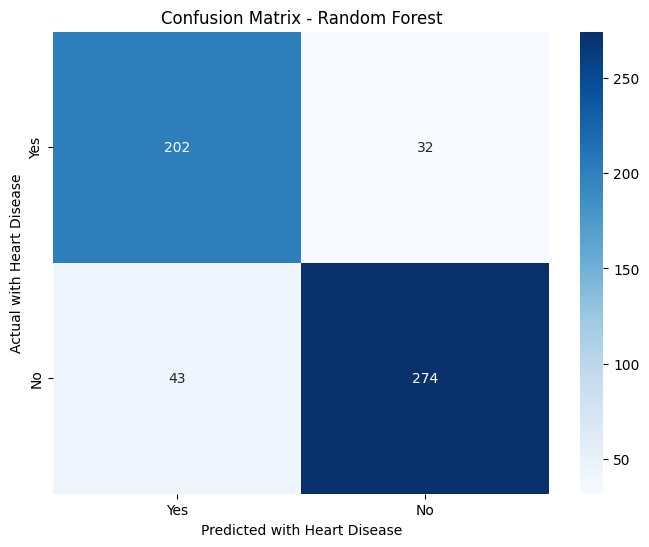

In [15]:
print('Random Forest Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted with Heart Disease')
plt.ylabel('Actual with Heart Disease')
plt.show()

# Classification Report

In [16]:
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       234
           1       0.90      0.86      0.88       317

    accuracy                           0.86       551
   macro avg       0.86      0.86      0.86       551
weighted avg       0.87      0.86      0.86       551

